# Feature Scaling, Standarization

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# load dataset
df = pd.read_csv('../Dataset/Social_Network_Ads.csv')

In [45]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
df = df.iloc[:,2:] # removing first two columns

In [47]:
df.sample(5)

,Age,EstimatedSalary,Purchased
346,53,72000,1
66,24,19000,0
398,36,33000,0
176,35,47000,0
156,46,59000,0


In [48]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
# Split the data: 70% for training (test_size=0.3) and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
# Check the dimensions (rows, columns) of the resulting training and testing sets.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Standard scaler

In [75]:
# Import the StandardScaler class for feature scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
# transform both the training and testing feature sets using the fitted scaler.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# mean
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [51]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [71]:
# convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [72]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [54]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

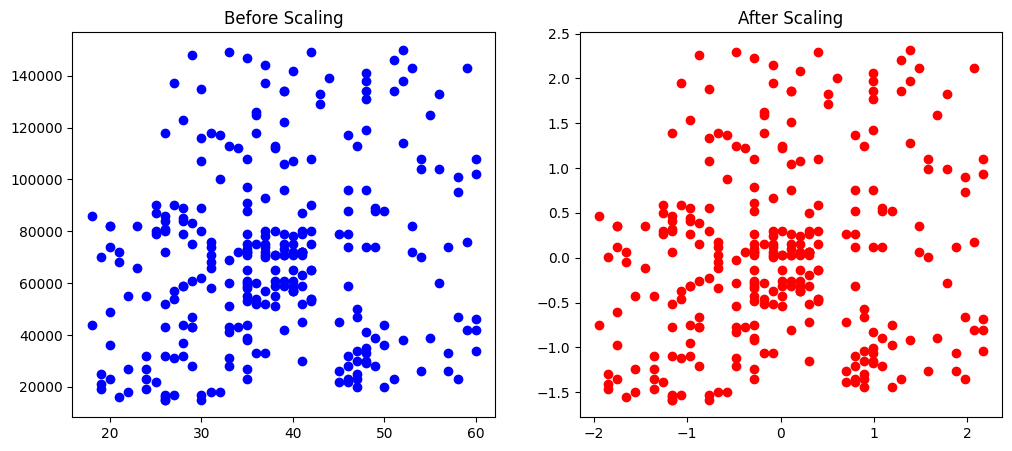

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], c='blue')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], c='red')
ax2.set_title('After Scaling')
plt.show()

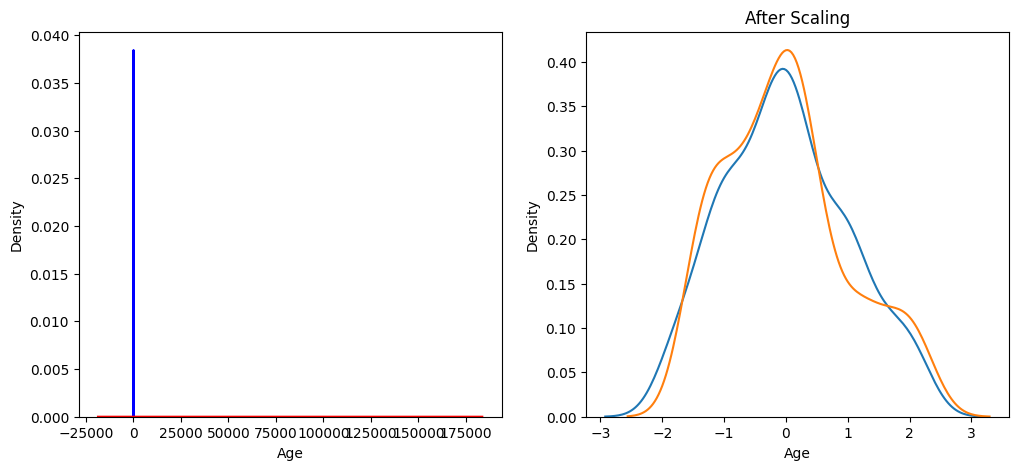

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# before Scaling
sns.kdeplot(X_train['Age'], ax=ax1, color='blue')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color='red')

# after Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

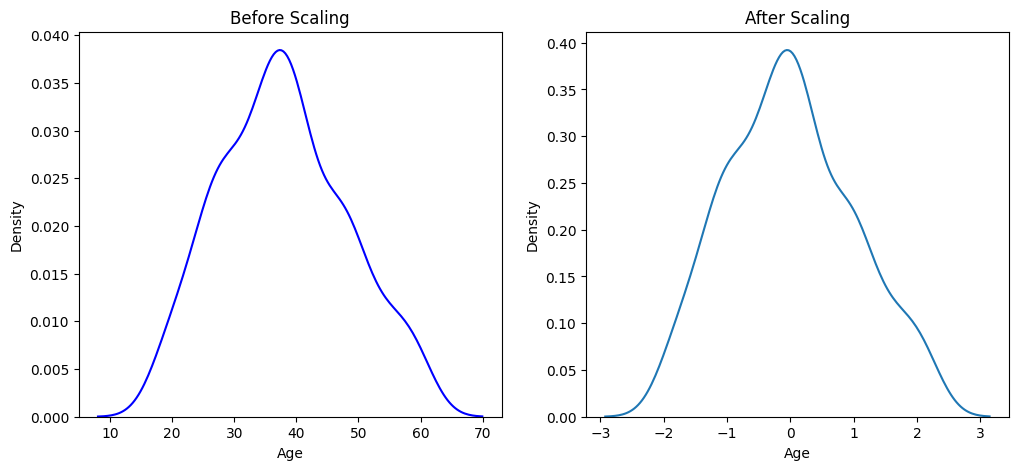

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, color='blue')

# after Scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

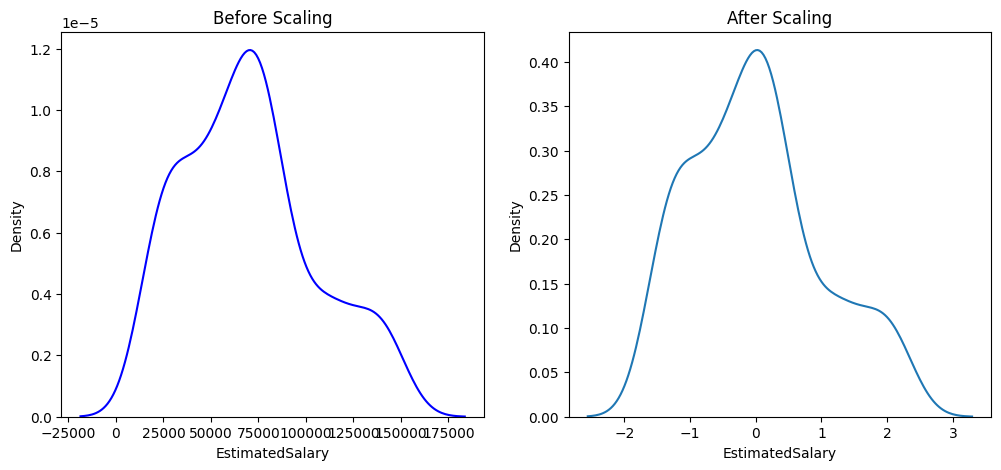

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color='blue')

# after Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important

In [59]:
# Import LogisticRegression for model training
from sklearn.linear_model import LogisticRegression

In [60]:
# create LogisticRegression model instances
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [61]:
# fit the models
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [62]:
# make predictions
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print("Accuracy before Scaling:", accuracy_score(y_test, y_pred))
print("Accuracy after Scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy before Scaling: 0.875
Accuracy after Scaling: 0.8666666666666667


In [65]:
# Import DecisionTreeClassifier for model training
from sklearn.tree import DecisionTreeClassifier

In [66]:
# create DecisionTreeClassifier model instances
dt =DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [67]:
# fit the models
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [68]:
# make predictions
y_pred = dt.predict(X_test)
y_pred_scaled =dt_scaled.predict(X_test_scaled)

In [69]:
print("Accuracy before Scaling:", accuracy_score(y_test, y_pred))
print("Accuracy after Scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy before Scaling: 0.875
Accuracy after Scaling: 0.8666666666666667


In [70]:
# display statistical summary of the dataset
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
